In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
#normalizer
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
StandardScaler = preprocessing.StandardScaler()

# 1 Read Data and PreProcessing

In [3]:
raw_path = 'anime cleaned.csv' #local lacation, you can modify it to the path of your cleaned anime data

In [4]:
df = pd.read_csv(raw_path)
#drop rows that don't have a rating
df = df[df['Score'].notna()]
df

/var/folders/ts/xc6_h0kd5nv7gws_x4n04jwr0000gn/T/ipykernel_7032/957651666.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_path)


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,(ratings)PG-13 - Teens 13 or older,(ratings)R - 17+ (violence & profanity),(ratings)R+ - Mild Nudity,(ratings)Rx - Hentai,(ratings)Unknown,(episodes length)continue,(episodes length)extra_short,(episodes length)long,(episodes length)medium,(episodes length)short
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",1998.0,...,0,1,0,0,0,0,0,0,0,1
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,...,0,1,0,0,0,0,1,0,0,0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",1998.0,...,1,0,0,0,0,0,0,0,0,1
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",2002.0,...,1,0,0,0,0,0,0,0,0,1
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",2004.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,47398,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,Unknown,キメツ学園 バレンタイン編,ONA,4,"Feb 14, 2021",NaN,...,1,0,0,0,0,0,1,0,0,0
17505,47402,Heikousen,7.52,"Music, Romance",Unknown,平行線,Music,1,"Feb 5, 2021",NaN,...,0,0,0,0,0,0,1,0,0,0
17512,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Cooking with Valkyries Spring Festival Special,Unknown,Special,1,"Feb 11, 2021",NaN,...,0,0,0,0,0,0,1,0,0,0
17513,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",The Promised Neverland Season 2 Episode 5.5,約束のネバーランド 特別編「道標」,Special,1,"Feb 12, 2021",NaN,...,0,1,0,0,0,0,1,0,0,0


In [5]:
linspace = np.linspace(1, 10, 20) #score linespace for plotting

### Get x and y

In [6]:
#Get Target y
y = np.array(df['Score'])
y

array([8.78, 8.39, 8.24, ..., 6.83, 4.81, 6.52])

In [140]:
np.mean(y)

6.509999194911844

In [8]:
#get predictor x
type_start = df.columns.get_loc("(type)Movie")
type_end = df.columns.get_loc("(type)Unknown")
x_type = df.iloc[:,type_start:type_end+1]
x_type

,(type)Movie,(type)Music,(type)ONA,(type)OVA,(type)Special,(type)TV,(type)Unknown
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
17504,0,0,1,0,0,0,0
17505,0,1,0,0,0,0,0
17512,0,0,0,0,1,0,0
17513,0,0,0,0,1,0,0


In [9]:
genre_start = df.columns.get_loc("(genre)Action")
genre_end = df.columns.get_loc("(genre)Yuri")
x_genre = df.iloc[:,genre_start:genre_end+1]
x_genre

,(genre)Action,(genre)Adventure,(genre)Cars,(genre)Comedy,(genre)Dementia,(genre)Demons,(genre)Drama,(genre)Ecchi,(genre)Fantasy,(genre)Game,...,(genre)Slice of Life,(genre)Space,(genre)Sports,(genre)Super Power,(genre)Supernatural,(genre)Thriller,(genre)Unknown,(genre)Vampire,(genre)Yaoi,(genre)Yuri
0,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17512,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [10]:
producer_start = df.columns.get_loc("(producers)12 Diary Holders")
producer_end = df.columns.get_loc("(producers)voque ting")
x_producer = df.iloc[:,producer_start:producer_end+1]
x_producer

,(producers)12 Diary Holders,(producers)1st PLACE,(producers)1theK,(producers)3xCube,(producers)4Kids Entertainment,(producers)5pb.,(producers)81 Produce,(producers)A-1 Pictures,(producers)A-Craft,(producers)A-Line,...,(producers)indigo line,(producers)it's,(producers)m.o.e.,(producers)monofilmo,(producers)pH Studio,(producers)project lights,(producers)studioGONG,(producers)syn Sophia,(producers)teamKG,(producers)voque ting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
studio_start = df.columns.get_loc("(studios)10Gauge")
studio_end = df.columns.get_loc("(studios)ufotable, feel., Studio Flag")
x_studio = df.iloc[:,studio_start:studio_end+1]
x_studio

,(studios)10Gauge,"(studios)10Gauge, Studio DURIAN",(studios)1IN,(studios)2:10 AM Animation,(studios)33 Collective,(studios)8bit,(studios)A-1 Pictures,"(studios)A-1 Pictures, Bridge","(studios)A-1 Pictures, Bridge, CloverWorks","(studios)A-1 Pictures, Lapin Track",...,(studios)foodunited.,(studios)helo.inc,(studios)iDRAGONS Creative Studio,"(studios)ixtl, LIDENFILMS",(studios)monofilmo,(studios)pH Studio,"(studios)pH Studio, D & D Pictures",(studios)production doA,(studios)ufotable,"(studios)ufotable, feel., Studio Flag"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17505,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
rating_start = df.columns.get_loc("(ratings)G - All Ages")
rating_end = df.columns.get_loc("(ratings)Unknown")
x_rating = df.iloc[:,rating_start:rating_end+1]
x_rating

,(ratings)G - All Ages,(ratings)PG - Children,(ratings)PG-13 - Teens 13 or older,(ratings)R - 17+ (violence & profanity),(ratings)R+ - Mild Nudity,(ratings)Rx - Hentai,(ratings)Unknown
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
17504,0,0,1,0,0,0,0
17505,1,0,0,0,0,0,0
17512,0,1,0,0,0,0,0
17513,0,0,0,1,0,0,0


In [13]:
episode_length_start = df.columns.get_loc("(episodes length)continue")
episode_length_end = df.columns.get_loc("(episodes length)short")
x_episode_length= df.iloc[:,episode_length_start:episode_length_end+1]
x_episode_length

,(episodes length)continue,(episodes length)extra_short,(episodes length)long,(episodes length)medium,(episodes length)short
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
17504,0,1,0,0,0
17505,0,1,0,0,0
17512,0,1,0,0,0
17513,0,1,0,0,0


In [14]:
# func of replace_nan_by_avg
def replace_nan_by_avg(array):
    col_mean = np.nanmean(array)
    inds = np.where(np.isnan(array))
    array[inds] = np.take(col_mean, inds[1])
    return array.reshape(-1, 1)

In [15]:
#get other variables
x_year = np.array(df['Premiered']).reshape(-1, 1)
x_year = StandardScaler.fit_transform(x_year)
x_year = replace_nan_by_avg(x_year)

x_popularity  = np.array(df['Popularity']).reshape(-1, 1)
x_popularity  = StandardScaler.fit_transform(x_popularity)
x_popularity = replace_nan_by_avg(x_popularity);

In [16]:
#get feature names for later feature selection
features_names = []
col_list = [x_type, x_genre, x_producer, x_studio, x_rating, x_episode_length]
for i in col_list:
    current_feature_name = [i.columns[j] for j in range(len(i.columns))]
    features_names += current_feature_name
features_names += ['Premiered']
features_names += ['Popularity']

In [17]:
#transfrom above one hot variables to (-1, x) shape array
x_type = x_type.to_numpy().reshape(-1, x_type.shape[1])
x_genre = x_genre.to_numpy().reshape(-1, x_genre.shape[1])
x_producer = x_producer.to_numpy().reshape(-1, x_producer.shape[1])
x_studio = x_studio.to_numpy().reshape(-1, x_studio.shape[1])
x_rating = x_rating.to_numpy().reshape(-1, x_rating.shape[1])
x_episode_length = x_episode_length.to_numpy().reshape(-1, x_episode_length.shape[1])

In [18]:
#concatenate them
x = np.concatenate((x_type, x_genre, x_producer, x_studio, x_rating, x_episode_length, x_year, x_popularity), axis=1)
x.shape

(12421, 2462)

### Train Test Split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 11745428)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9936, 2462), (2485, 2462), (9936,), (2485,))

# 2 Prediction Algorithm

### 2.1 Multiple Linear Regression

In [20]:
reg = LinearRegression().fit(x_train, y_train)

In [21]:
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

train_COD = r2_score(y_train,y_train_pred)
test_COD = r2_score(y_test,y_test_pred)

train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False).round(3)
test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False).round(3)

print('train COD: ', train_COD)
print('test COD: ', test_COD)

print('train RMSE: ', train_RMSE)
print('test RMSE: ', test_RMSE)

train COD:  0.7456917501626583
test COD:  -2.930217887149862e+21
train RMSE:  0.448
test RMSE:  47815009615.696


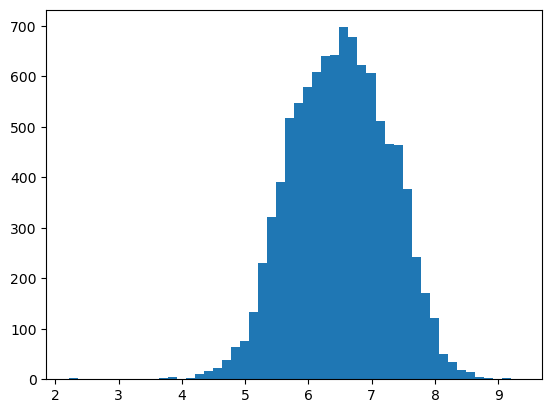

In [23]:
plt.hist(y_train_pred, bins = 50);

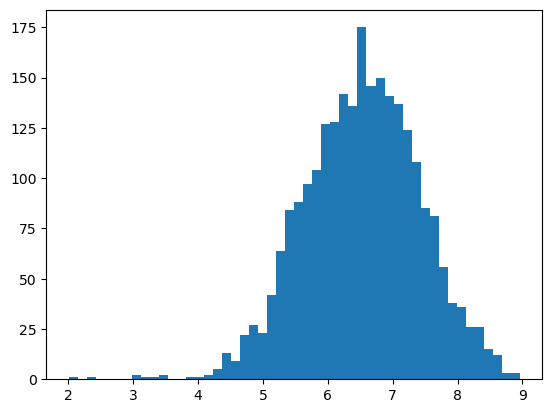

In [25]:
plt.hist(y_test, bins = 50);

Text(0.5, 1.0, 'True vs Predicted (Test)')

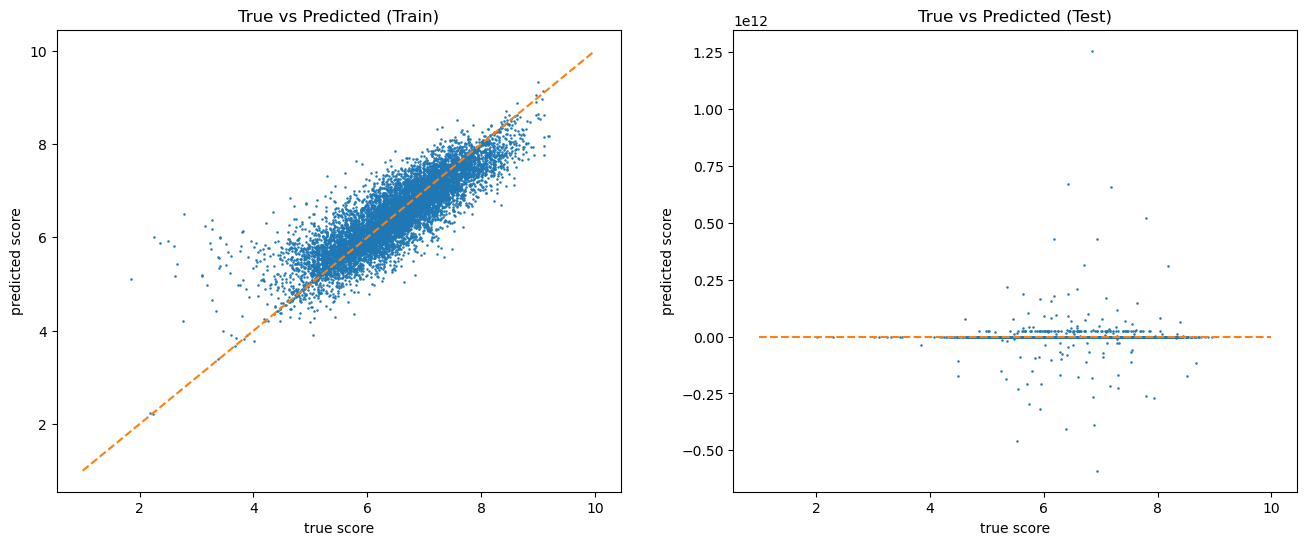

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(y_train, y_train_pred, 'o', ms = 0.8)
ax[0].plot(linspace, linspace, '--')
ax[0].set_xlabel('true score')
ax[0].set_ylabel('predicted score')
ax[0].set_title('True vs Predicted (Train)')

ax[1].plot(y_test, y_test_pred, 'o', ms = 0.8)
ax[1].plot(linspace, linspace, '--')
ax[1].set_xlabel('true score')
ax[1].set_ylabel('predicted score')
ax[1].set_title('True vs Predicted (Test)')

### 2.2 LassoCV

In [20]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import joblib

In [24]:
alpha_choice_range = np.logspace(-10, 10, 100)
LassoCV = LassoCV(alphas = alpha_choice_range).fit(x_train, y_train)

#save model
joblib.dump(LassoCV, "LassoCV.pkl") 

/Users/zhanghanyuan/opt/anaconda3/envs/timeseries/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.123760440566457, tolerance: 0.6194504089519378
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zhanghanyuan/opt/anaconda3/envs/timeseries/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.43120277816115, tolerance: 0.6194504089519378
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zhanghanyuan/opt/anaconda3/envs/timeseries/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.541784557749, tolerance: 0.6194504089519378
  model = cd_fast.enet_coordinate

['LassoCV.pkl']

In [21]:
#load the model
LassoCV = joblib.load("lassoCV.pkl")

In [22]:
LassoCV_optimal_alpha = LassoCV.alpha_
LassoCV_optimal_alpha

0.00011497569953977356

train COD:  0.6932870607643409
test COD:  0.6474121515847661
train RMSE:  0.491
test RMSE:  0.525


Text(0.5, 1.0, 'True vs Predicted (Test)')

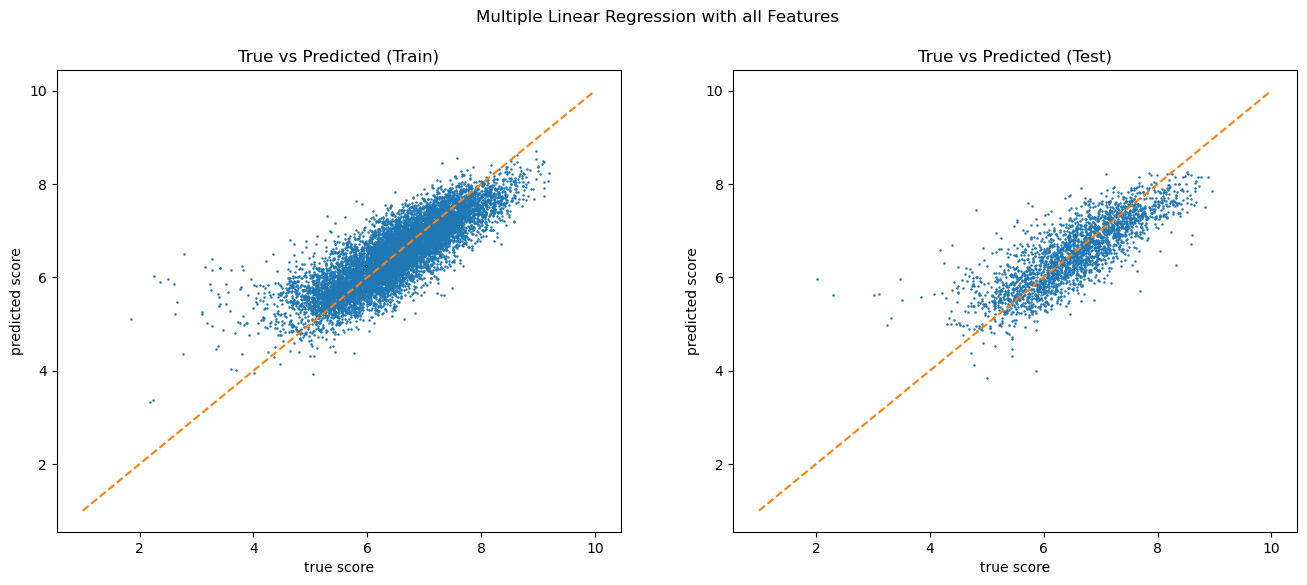

In [23]:
y_train_pred = LassoCV.predict(x_train)
y_test_pred = LassoCV.predict(x_test)

train_COD = r2_score(y_train,y_train_pred)
test_COD = r2_score(y_test,y_test_pred)

train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False).round(3)
test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False).round(3)

print('train COD: ', train_COD)
print('test COD: ', test_COD)

print('train RMSE: ', train_RMSE)
print('test RMSE: ', test_RMSE)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Multiple Linear Regression with all Features')
ax[0].plot(y_train, y_train_pred, 'o', ms = 0.8)
ax[0].plot(linspace , linspace , '--')
ax[0].set_xlabel('true score')
ax[0].set_ylabel('predicted score')
ax[0].set_title('True vs Predicted (Train)')

ax[1].plot(y_test, y_test_pred, 'o', ms = 0.8)
ax[1].plot(linspace , linspace , '--')
ax[1].set_xlabel('true score')
ax[1].set_ylabel('predicted score')
ax[1].set_title('True vs Predicted (Test)')

In [24]:
coefficients = LassoCV.coef_
#importance of each features
importance = np.abs(coefficients)
importance

array([0.12194008, 0.22924322, 0.12047034, ..., 0.03284244, 0.16474124,
       0.58482363])

In [25]:
#feature importance selector, return a binary array
#if the entry is 1, the correspdonding feature is maintained
importance_selector = []
for i, item in enumerate(importance):
    if item > 1e-10:
        importance_selector.append(True)
    else:
        importance_selector.append(False)
importance_selector = np.array(importance_selector)
importance_selector = importance_selector.astype(int)
len(importance_selector), importance_selector

(2462, array([1, 1, 1, ..., 1, 1, 1]))

In [26]:
num_of_selected_feature = sum(importance_selector)
num_of_selected_feature

629

In [27]:
# #get data with all 629 selected features
# x_train_selected = x_train[:, importance_selector.astype(bool)]
# x_test_selected = x_test[:, importance_selector.astype(bool)]
# y_train_selected = y_train
# y_test_selected = y_test

# #transform them to float 32
# x_train_selected, x_test_selected, y_train_selected, y_test_selected = \
#     x_train_selected.astype(np.float32), x_test_selected.astype(np.float32), y_train_selected.astype(np.float32), y_test_selected.astype(np.float32)
# x_train_selected.shape, x_test_selected.shape, y_train_selected.shape, y_test_selected.shape

In [28]:
#get the index of ranked importance (descending)
ranked_index = np.argsort(importance)[:-1][::-1]
coefs_of_important_features = [coefficients[ranked_index[i]] for i in range(len(ranked_index))]

#get the name of important features
important_features_name = [features_names[ranked_index[i]] for i in range(len(ranked_index))]

### 2.3 Control Numbers of Features (Ridge Regression)

In [29]:
from sklearn.linear_model import Ridge

In [30]:
# num_of_fearure_choice = np.concatenate((np.arange(10, num_of_selected_feature+1, 10), np.array([num_of_selected_feature])), axis = 0)
num_of_feature_choice = np.arange(1, num_of_selected_feature+1, 1)

In [31]:
train_RMSE_list = []
test_RMSE_list = []

for index, num in enumerate(num_of_feature_choice):
    #for each loop, we use the top num's selected features as input x
    current_x_train = x_train[:, ranked_index[:num]]
    current_x_test = x_test[:, ranked_index[:num]]

    ridge = Ridge(alpha = 1).fit(current_x_train, y_train)

    y_train_pred = ridge.predict(current_x_train)
    y_test_pred = ridge.predict(current_x_test)

    train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False).round(3)
    test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False).round(3)

    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

train_RMSE_list = np.array(train_RMSE_list)
test_RMSE_list = np.array(test_RMSE_list)

In [35]:
#in the end, we have all 629 selected features
x_train_selected = current_x_train
x_test_selected = current_x_test
y_train_selected = y_train
y_test_selected = y_test

#transform them to float 32
x_train_selected, x_test_selected, y_train_selected, y_test_selected = \
    x_train_selected.astype(np.float32), \
    x_test_selected.astype(np.float32), \
    y_train_selected.astype(np.float32), \
    y_test_selected.astype(np.float32)
x_train_selected.shape, x_test_selected.shape, y_train_selected.shape, y_test_selected.shape

((9936, 629), (2485, 629), (9936,), (2485,))

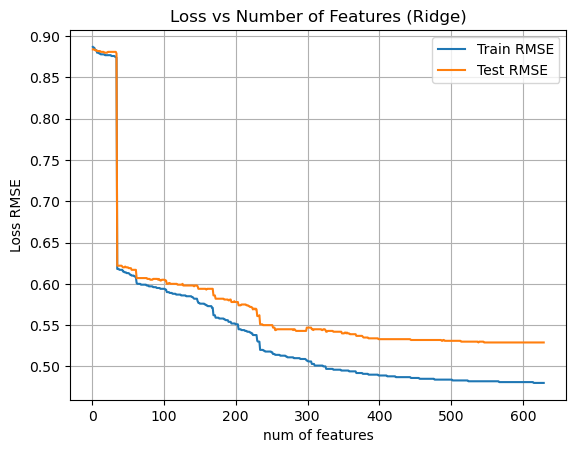

In [36]:
plt.figure()
plt.plot(num_of_feature_choice, train_RMSE_list, label = 'Train RMSE')
plt.plot(num_of_feature_choice, test_RMSE_list, label = 'Test RMSE')
plt.grid()
plt.xlabel('num of features')
plt.ylabel('Loss RMSE')
plt.title('Loss vs Number of Features (Ridge)')
plt.legend()

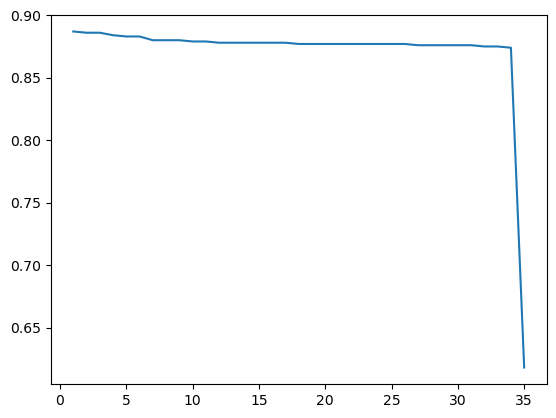

In [37]:
plt.plot(num_of_feature_choice[:35], train_RMSE_list[:35], label = 'Train RMSE')
#there is a significant drop in 34th feature

In [38]:
important_features_name[:100], coefs_of_important_features[:100]

(['(producers)CUCURI',
  '(producers)Natural High',
  '(producers)Design Factory',
  '(producers)Idea Factory',
  '(studios)ILCA, DRAWIZ, Toho Interactive Animation',
  '(studios)Studio elle, l-a-unch・BOX',
  '(producers)Kuri Jikken Manga Kobo',
  '(studios)YHKT Entertainment',
  '(studios)RAMS',
  '(studios)Kyotoma',
  '(producers)G-mode',
  '(studios)Sparkly Key Animation Studio',
  '(producers)Tohan Corporation',
  '(studios)Gonzo, Seven',
  '(studios)Tama Production',
  '(studios)LICO, Red Dog Culture House',
  '(producers)Primastea',
  '(studios)EMT Squared',
  '(studios)AIC Frontier',
  '(studios)L²Studio',
  '(producers)Shufunotomo',
  '(studios)Studio Pierrot, Pierrot Plus',
  '(studios)Motion Magic',
  '(studios)Kyotoma, Office Nobu',
  '(producers)LINE Corporation',
  '(studios)PERIMETRON',
  '(studios)Gainax, Production I.G',
  '(studios)Enishiya',
  '(studios)Imagin, Studio Live',
  '(studios)Soyep',
  '(studios)Saetta',
  '(studios)Ruo Hong Culture',
  '(producers)Rex Ente

In [39]:
#discover what happend in 35th feature
important_features_name[34], coefs_of_important_features[34]
#It is the popuality, which is very different with previous features

('Popularity', -0.5848236276339972)

train COD:  0.7071325980328955
test COD:  0.641867869916204
train RMSE:  0.48
test RMSE:  0.529


Text(0.5, 1.0, 'True vs Predicted (Test)')

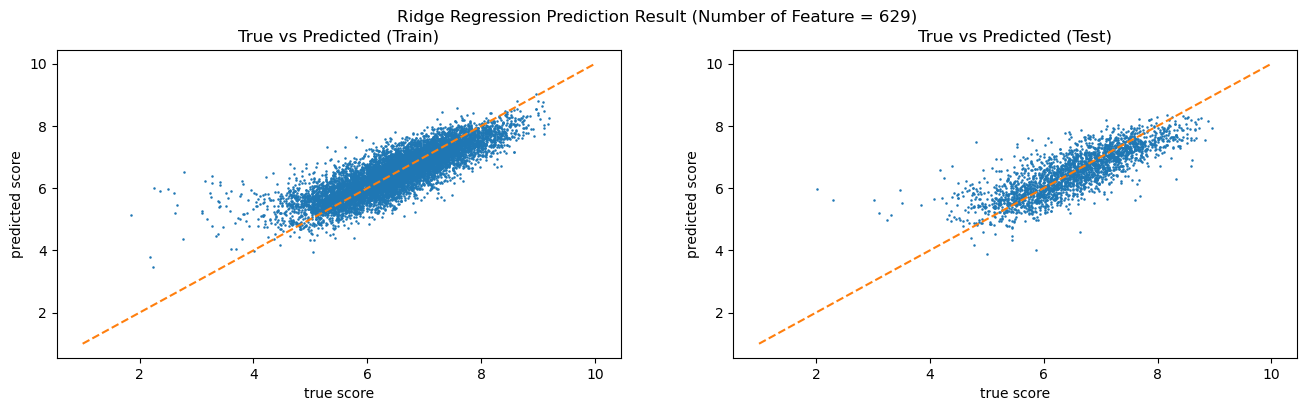

In [40]:
#Also, we want to get the best RMSE result when num of feature = 629
y_train_pred = ridge.predict(current_x_train)
y_test_pred = ridge.predict(current_x_test)

train_COD = r2_score(y_train,y_train_pred)
test_COD = r2_score(y_test,y_test_pred)

train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False).round(3)
test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False).round(3)

print('train COD: ', train_COD)
print('test COD: ', test_COD)

print('train RMSE: ', train_RMSE)
print('test RMSE: ', test_RMSE)

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle('Ridge Regression Prediction Result (Number of Feature = 629)')
ax[0].plot(y_train, y_train_pred, 'o', ms = 0.8)
ax[0].plot(linspace , linspace , '--')
ax[0].set_xlabel('true score')
ax[0].set_ylabel('predicted score')
ax[0].set_title('True vs Predicted (Train)')

ax[1].plot(y_test, y_test_pred, 'o', ms = 0.8)
ax[1].plot(linspace , linspace , '--')
ax[1].set_xlabel('true score')
ax[1].set_ylabel('predicted score')
ax[1].set_title('True vs Predicted (Test)')

### 2.4 NN

In [124]:
## build NN
import os
import torch
from torch import nn
from torch.utils.data import DataLoader

Step 1: get selected features given by Lasso

In [125]:
#data with selected features in tensor format
x_train_selected_tensor = torch.from_numpy(x_train_selected)
x_test_selected_tensor = torch.from_numpy(x_test_selected)
y_train_selected_tensor = torch.from_numpy(y_train_selected)
y_test_selected_tensor = torch.from_numpy(y_test_selected)

Step 2: start to build NN model

In [126]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [127]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(x_train_selected.shape[1], 4),
            nn.ReLU(),
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.dropout(x)
        logits = self.linear_relu_stack(x)
        return logits

In [129]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=629, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
)


In [130]:
logits = model(x_train_selected_tensor)

In [131]:
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self,yhat,y):
        return torch.sqrt(self.mse(yhat,y))
        
loss_criterion = RMSELoss()

In [132]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-5)

In [133]:
%timeit
train_loss_log = []
test_loss_log = []

for t in range(800):
    model.train()

    y_pred = model(x_train_selected_tensor)
    train_loss = loss_criterion(y_pred, y_train_selected_tensor)
    train_loss_log.append(train_loss.item())

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    with torch.no_grad():
        model.eval()
        y_test_pred = model(x_test_selected_tensor)
        test_loss = loss_criterion(y_test_pred, y_test_selected_tensor)
        test_loss_log.append(test_loss.item())
        # for param in model.parameters():
        #     param -= learning_rate * param.grad

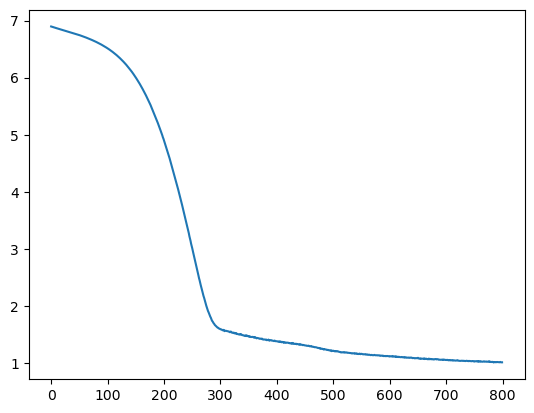

In [134]:
plt.plot(train_loss_log)

In [135]:
joblib.dump(model, "NN.pkl") 

['NN.pkl']

In [136]:
NNmodel = joblib.load("NN.pkl") 

In [137]:
from torchmetrics import R2Score
pytorch_r2score = R2Score()

In [138]:
y_train_pred = NNmodel(x_train_selected_tensor)
y_test_pred = NNmodel(x_test_selected_tensor)

train_RMSE = loss_criterion(y_train_pred, y_train_selected_tensor)
test_RMSE = loss_criterion(y_test_pred, y_test_selected_tensor)

print('train RMSE: ', train_RMSE)
print('test RMSE: ', test_RMSE)

train RMSE:  tensor(0.9273, grad_fn=<SqrtBackward0>)
test RMSE:  tensor(0.9380, grad_fn=<SqrtBackward0>)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


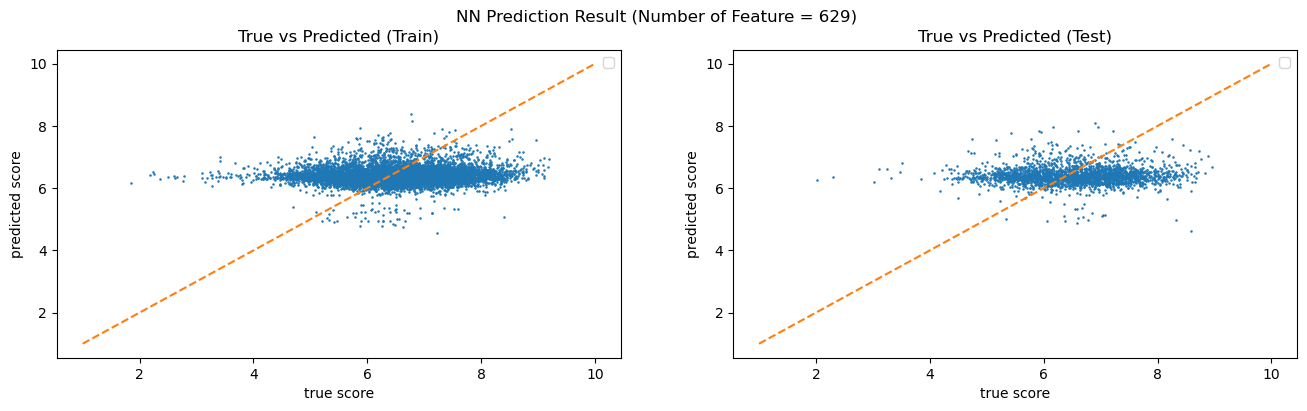

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle('NN Prediction Result (Number of Feature = 629)')
ax[0].plot(y_train_selected_tensor.detach().numpy(), y_train_pred.detach().numpy(), 'o', ms = 0.8)
ax[0].plot(linspace , linspace , '--')
ax[0].set_xlabel('true score')
ax[0].set_ylabel('predicted score')
ax[0].set_title('True vs Predicted (Train)')
ax[0].legend()

ax[1].plot(y_test_selected_tensor.detach().numpy(), y_test_pred.detach().numpy(), 'o', ms = 0.8)
ax[1].plot(linspace , linspace , '--')
ax[1].set_xlabel('true score')
ax[1].set_ylabel('predicted score')
ax[1].set_title('True vs Predicted (Test)')
ax[1].legend()